# Integrated gradients for resenet model trained on Imagenet dataset

In this notebook we show the usage of the IntegratedGradients class on sample images from imagenet and for a pretrained resnet model. 

The IntegratedGradients class implements the integrated gradients features attributions method. A description of the method can be found here (link to method notebook). Integrated gradients was originally proposed in here (link to paper).

In [1]:
import numpy as np
import os
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.utils import to_categorical
from alibi.explainers import IntegratedGradients
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import fetch_imagenet
%matplotlib inline
tf.test.is_gpu_available()

env: CUDA_VISIBLE_DEVICES=2


True

## Load data

For the sake of the example, we load 10 images from the imagenet dataset, all belonging to the category "Persian cat". 

In [2]:
category = 'Persian cat'
image_shape = (224, 224, 3)
data, labels = fetch_imagenet(category, nb_images=10, target_size=image_shape[:2], seed=2, return_X_y=True)
print('Images shape: {}'.format(data.shape))

Images shape: (10, 224, 224, 3)


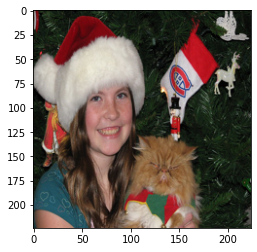

In [3]:
i = 1
plt.imshow(data[i]);

## Load model

We load a pretrained tensorflow model with an ResNet architecture trained on the imagenet dataset.

In [4]:
model = ResNet50V2(weights='imagenet')

## Calculate integrated gradients

In [5]:
n_steps = 50
method = "gausslegendre"
return_convergence_delta = True
return_predictions = False
ig  = IntegratedGradients(model,
                          n_steps=n_steps, 
                          method=method,
                          return_convergence_delta=return_convergence_delta, 
                          return_predictions=return_predictions)

In [6]:
explanation = ig.explain(data, 
                         baselines=None, 
                         target=labels,
                           internal_batch_size=50)

In [8]:
attrs = explanation.data['attributions']

## Visualize attributions

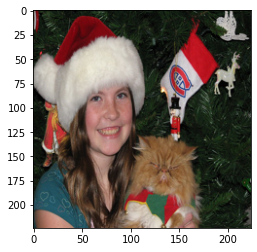

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


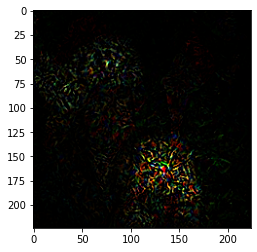

In [9]:
# Show sample image from the first 10 images of the test dataset.
# The attributions are scaled by an appropriate factor for visualization purposes.
plt.imshow(data[i])
plt.show()
plt.imshow(3 * attrs[i] / attrs[i].max())